In [2]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import plotly.express as px
from plotly.subplots import make_subplots
import myst_nb

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [5]:
sfh_all = pd.read_csv('data/sfhousing.csv', error_bad_lines=False)
sfh = sfh_all.query('year == 2004')
dogs = pd.read_csv('data/akc.csv').dropna()

b'Skipping line 30550: expected 11 fields, saw 12\n'
b'Skipping line 343819: expected 11 fields, saw 12\n'


In [88]:
def left_right(figsize=(8, 3)):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))
    return ax1, ax2

(ch:viz_scale)=
# Choosing Scale to Reveal Structure


Take a look at the following histogram of house prices.

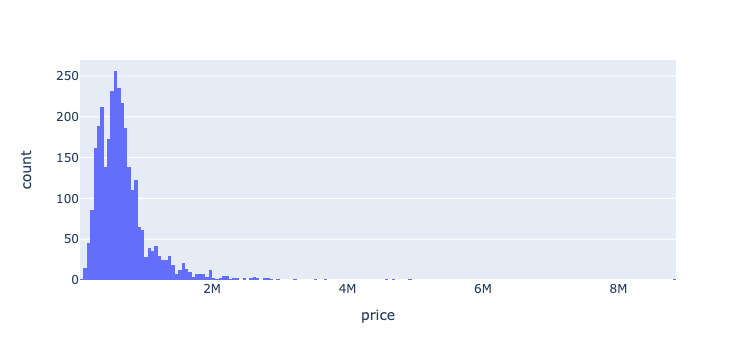

In [13]:
px.histogram(sfh, x='price', width=600, height=300)

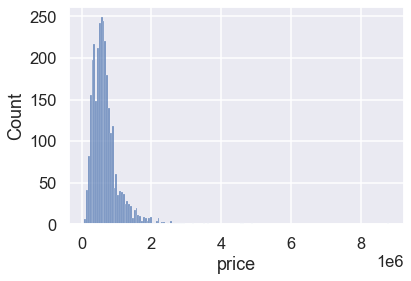

In [9]:
sns.histplot(data=sfh, x='price');

Is this plot accurate? Yes---it displays all the data.
But most of the data are crammed into the left side of the plot, which makes it
hard to use the plot to understand house prices.

Though data visualization, we want to reveal important facts about the data
like the shape of a distribution and the relationship between features. 
As this example shows, after we produce an initial plot there are still
other principles we need to consider.
In this section, we cover **principles of scale** which help us decide how to
adjust the axis limits, place tick marks, and apply transformations.


## Filling the Data Region

As we can see from the above plot of house prices, it's hard to read
a distribution when
most of the data appear in a small portion of the plotting region.
When this happens, we can't clearly see important facts about the data like
whether there are multiple modes or skewness.
A similar issue happens for scatter plots. 
When all the points are bunched together in a scatter plot, it's hard to
see nonlinearity.

This issue most often happens when there are 
a few unusually large observations.
In order to get a better view of the main portion
of the data we can drop these observations from the plot by adjusting the
x- or y-axis limits, or by removing outlier values from the data before
plotting.
In either case, we must mention this exclusion in
the caption or on the plot itself.

**Example: San Francisco Housing Price Distribution.**
Let's improve the plot of housing prices. In the plot below, we've put the
default histogram on the left. On the right, we've excluded houses that cost
over \$200,000 by adjusting the x-axis limits. 
The shape of the distribution for the bulk of the houses is much clearer in 
this plot.
For instance, we can more easily observe the skewness of the main mode.

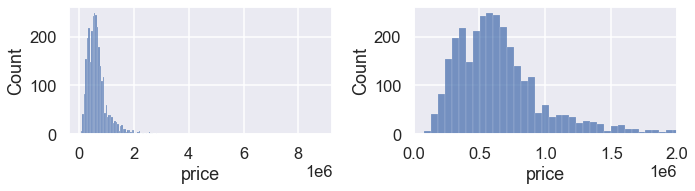

In [89]:
ax1, ax2 = left_right()

sns.histplot(data=sfh, x='price', ax=ax1)

sns.histplot(data=sfh, x='price', ax=ax2)
plt.setp(ax2, xlim=(0, 2e6))

plt.tight_layout();

We can also show detail in the long right tail of this distribution with
a separate plot, displayed below.

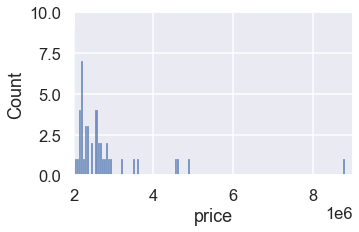

In [30]:
plt.figure(figsize=(5, 3))
sns.histplot(data=sfh, x='price')
plt.xlim(2e6, 9e6)
plt.ylim(0, 10);

In this example, we addressed the issue of scale in the original plot of 
housing prices by making two plots, one for the bulk of the data and one for
the tail.
By choosing useful x- and y-axis limits for both plots, we can show more
useful information about the distribution.

**Including Zero.**
We often don't need to include 0 on an axis, especially
if including it makes it difficult to fill the data region.
For instance, the scatter plot below shows the average longevity plotted
against average height for dog breeds. The x-axis starts at 10 cm since
all dogs are taller than that.

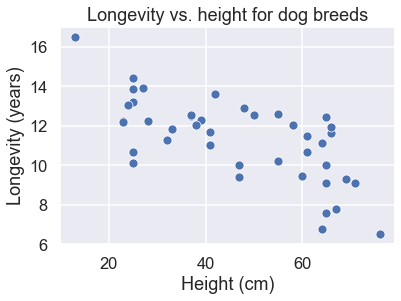

In [80]:
sns.scatterplot(data=dogs, x='height', y='longevity')
plt.title('Longevity vs. height for dog breeds')
plt.xlabel('Height (cm)')
plt.ylabel('Longevity (years)');

There are a few cases where we usually want to include 0.
For bar charts, including 0 is important.
We've created two bar charts below. The left plot includes 0, but the right
plot doesn't. It's easy to incorrectly conclude from the right
plot that medium-sized dogs live twice as long as large-sized dogs.

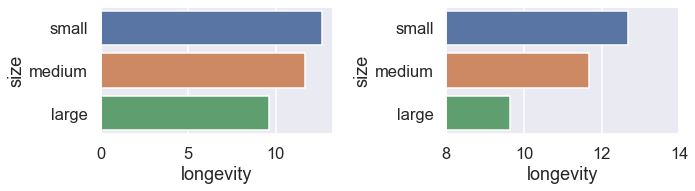

In [90]:
ax1, ax2 = left_right()
sml = ['small', 'medium', 'large']
sns.barplot(data=dogs, x='longevity', y='size', order=sml, ci=False, ax=ax1)
sns.barplot(data=dogs, x='longevity', y='size', order=sml, ci=False, ax=ax2)
plt.setp(ax2, xlim=(8, 14))
plt.tight_layout()

We also typically want to include zero when working with proportions, since
proportions range from 0 to 1.
The plot below shows the proportion of dogs of each size in our dataset.

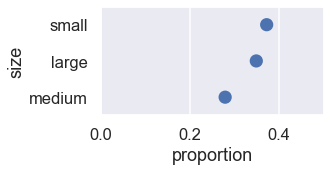

In [78]:
size_props = ((dogs['size'].value_counts() / len(dogs))
              .reset_index()
              .rename(columns={'index': 'size', 'size': 'proportion'}))

plt.figure(figsize=(4, 2))
sns.pointplot(data=size_props, x='proportion', y='size', join=False);
plt.xlim(0, 0.5);

**Banking to Decipher Relationships.** With scatterplots, we try to choose a
scale so that the relationship between the two features roughly follows a
45-degree line. This is called "banking to 45 degrees", and makes it
easier for the reader to see shape and trends.
That is, it is much easier for us to
determine departures from a line when the data roughly fall along a 45-degree
line within the plotting region.
For instance, the plots below show longevity of dog breeds against height.
The plot on the right has been banked to 45 degrees, and we can more easily
see where the data deviate.

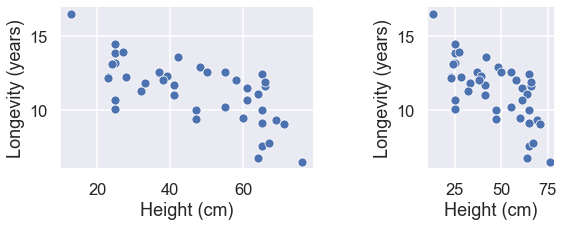

In [96]:
ax1, ax2 = left_right()

sns.scatterplot(data=dogs, x='height', y='longevity', ax=ax1)

sns.scatterplot(data=dogs, x='height', y='longevity', ax=ax2)
plt.gca().set_aspect(8)

plt.setp([ax1, ax2], xlabel='Height (cm)');
plt.setp([ax1, ax2], ylabel='Longevity (years)');

## Revealing Shape Through Transformations

TRANSFORMATIONS - reveal distribution of most of the observations (otherwise
much of the data is squashed into a small region of the plot). reveal anomalies
on the "other side" of the data. Numerical summaries of transformed data have
better properties if the transformation leads to a symmetric distribution or a
straightened relationship. Easier to uncover the form of a relationship after
it is transformed to a linear relationship. Linear relationships are
particularly simple to interpret and fit.  

**Revealing Shape Through Transformations.** Filling the data region is often a
problem with highly skewed distributions, and a log transformation can help
fill the data region. Additionally, when a transformation results in a
symmetric distribution, this provides useful information about the
distribution. For example, if a density curve of log-transformed values is
approximately normal in shape, then we know the distribution of the original
values is roughly log-normal.

Example: San Francisco Housing Price Distribution. In Figure X, we clipped the
highest-priced houses from the data to reveal the shape of the bulk of the
distribution of prices. Alternatively, we examine the distribution of sale
price on a log scale in Figure Y. We still see features that were evident in
Figure X, such as the shoulder on the left side of the mode and a possible
smaller mode near $1.2million. However, now we also see a roughly symmetric
distribution.

**Revealing Relationships Through Straightening.** As described in Section X,
since it is easier for us to recognize linearity that to distinguish between
different non-linear relationships, we apply transformations to create visual
displays of linear relationships. We call this straightening, and it helps us
assess the form of nonlinearity.